# Import relevant libraries 

In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()
#! pip install zipcodes
from pprint import pprint
import zipcodes

# Load the data 

In [2]:
df=pd.read_csv('kc_house_data_train.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

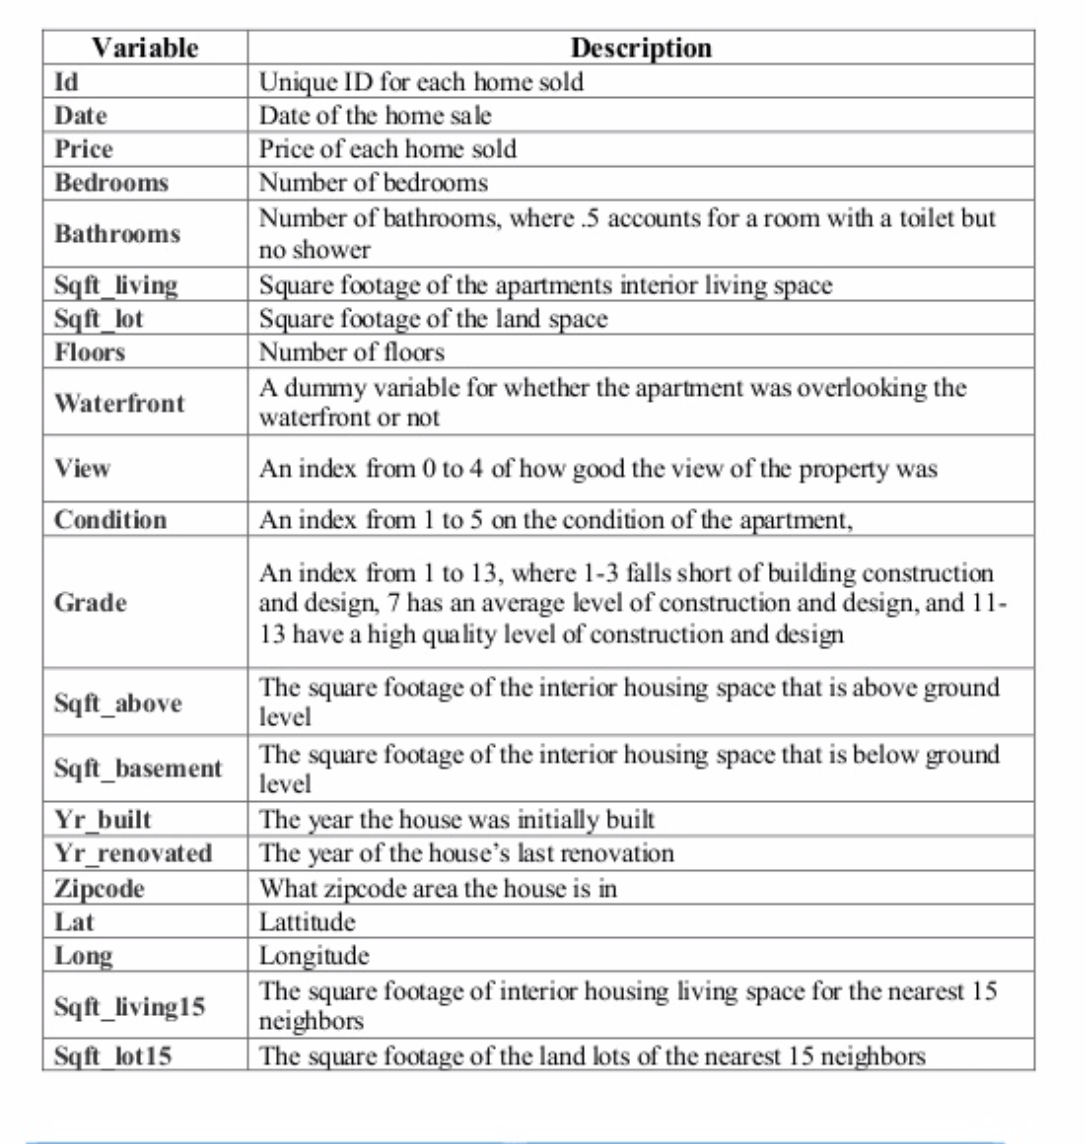

In [29]:
from PIL import Image
Image.open('data_dictionary.png')

# Descriptive statistics

In [5]:
df.describe(include='all')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,17290,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
unique,NaN,NaN,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140625T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8644.500000,4.565502e+09,NaN,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,...,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,NaN,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,...,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,NaN,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,NaN,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,...,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000


In [54]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_dum',
       'renovated_dum', 'basement_dum', 'city'],
      dtype='object')

# Create Dummy variables

## View

In [6]:
#check if there are other number beside 0 and 1 
# if no view return 0 , if there are at least one view return 1
df['view'].value_counts()


0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [7]:
type(df['view'][0])

numpy.int64

In [8]:
df['view_dum']=df['view'].map({0:0,1:1,2:1,3:1,4:1})
df['view_dum'].value_counts()

0    15571
1     1719
Name: view_dum, dtype: int64

## waterfront

In [9]:
# for waterfront dummy seems that it is already a dummy varibale 
# because there is no other numbers beside 0 and 1 
df['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

## Year_Renovated 

In [10]:
df['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [11]:
# if renovated return 1 if not return 0
df['renovated_dum']=df['yr_renovated'].map(lambda x: 1 if x!=0 else x)
df['renovated_dum'].value_counts()

0    16564
1      726
Name: renovated_dum, dtype: int64

## Basement

In [12]:
df['sqft_basement'].value_counts()

0       10484
500       177
700       174
600       165
800       164
        ...  
2050        1
243         1
1880        1
515         1
1135        1
Name: sqft_basement, Length: 290, dtype: int64

In [13]:
df['basement_dum']=df['sqft_basement'].map(lambda x: 1 if x!=0 else x)
df['basement_dum'].value_counts()


0    10484
1     6806
Name: basement_dum, dtype: int64

## 4.5 zipcode to match city

In [15]:
df['zipcode'].value_counts() # we can see there are 70 cities in the data 

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64

In [16]:
zipcodes.matching(str(df['zipcode'][0])) # it will return a dictionary 
# so I will do a loop to collect the cities and states

[{'zip_code': '98058',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Renton',
  'acceptable_cities': [],
  'unacceptable_cities': ['Cascade', 'Fairwood'],
  'state': 'WA',
  'county': 'King County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['425'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '47.4351',
  'long': '-122.1165'}]

In [17]:
# Find the path to have access to cities and states
c=zipcodes.matching(str(df['zipcode'][3]))[0]['city']
s=zipcodes.matching(str(df['zipcode'][3]))[0]['state']
c,s

('Kirkland', 'WA')

In [18]:
# then run the loop to obtian the cities and states by the order
# however it takes too long time so I used pickle to save the output for cities and states
cities=[]
states=[]
for i in range(0,len(df['zipcode'])):
    cities.append(zipcodes.matching(str(df['zipcode'][i]))[0]['city'])
    #states.append(zipcodes.matching(str(df['zipcode'][i]))[0]['state'])

In [25]:
# #import pickle to save output 
# import pickle
# # save the output locally
# with open('cities', 'wb') as fp:
#     pickle.dump(cities, fp)

In [26]:
# # save the output locally
# with open('states', 'wb') as fp:
#     pickle.dump(states, fp)

In [27]:
# # read the cities and states files
# ###cities
# pickle_1 = open("cities","rb")
# cities = pickle.load(pickle_1)

# ###states
# pickle_2 = open("states","rb")
# states=pickle.load(pickle_2)
# ### we can see data is only from WA state
# ### so we just need to focus on cities
# set(states)

In [35]:
df['city']=cities
len(cities),len(states)

(17290, 17290)

# Select the data we want to analyze 

In [366]:
#'sqft_living', 'floors','bedrooms', 'bathrooms', 'view_dum', 'renovated_dum', 'basement_dum'
data=df[['price', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15',
          'view', 'condition','grade', 'yr_built','city','view_dum'  
       ]].copy()

In [367]:
# to check the if there are missing data
data.isnull().sum()

price            0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
view             0
condition        0
grade            0
yr_built         0
city             0
view_dum         0
dtype: int64

In [368]:
# get the data descriptive statistics
data.describe(include='all')

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,view,condition,grade,yr_built,city,view_dum
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290,17290.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7176,NaN
mean,5.407395e+05,1.524340e+04,1789.306015,292.158589,1987.986698,12873.475824,0.238519,3.408502,7.654425,1970.792019,NaN,0.099422
std,3.733190e+05,4.230462e+04,829.265107,443.151874,684.802635,27227.437583,0.775229,0.651296,1.174718,29.343516,NaN,0.299236
min,7.500000e+04,5.720000e+02,290.000000,0.000000,399.000000,659.000000,0.000000,1.000000,1.000000,1900.000000,NaN,0.000000
25%,3.210000e+05,5.081250e+03,1200.000000,0.000000,1490.000000,5111.250000,0.000000,3.000000,7.000000,1951.000000,NaN,0.000000
50%,4.500000e+05,7.642000e+03,1560.000000,0.000000,1840.000000,7622.500000,0.000000,3.000000,7.000000,1974.000000,NaN,0.000000
75%,6.450000e+05,1.072575e+04,2214.500000,560.000000,2360.000000,10101.750000,0.000000,4.000000,8.000000,1996.000000,NaN,0.000000


In [369]:
# to get the dimention of our data 
data.shape

(17290, 12)

In [370]:
# to check if there are any missing value 
data.isnull().sum()

price            0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
view             0
condition        0
grade            0
yr_built         0
city             0
view_dum         0
dtype: int64

In [371]:
data.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'view', 'condition', 'grade', 'yr_built', 'city',
       'view_dum'],
      dtype='object')

In [372]:
data['city'].value_counts()

Seattle          7176
Renton           1304
Bellevue         1110
Kent              942
Redmond           798
Kirkland          790
Auburn            727
Sammamish         644
Federal Way       634
Issaquah          582
Maple Valley      455
Woodinville       377
Snoqualmie        249
Mercer Island     229
Kenmore           219
Enumclaw          189
North Bend        176
Bothell           163
Duvall            145
Carnation         101
Vashon             99
Black Diamond      74
Fall City          65
Medina             42
Name: city, dtype: int64

#  Distribution 

## Distribution for numerical variables

In [373]:
data.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'view', 'condition', 'grade', 'yr_built', 'city',
       'view_dum'],
      dtype='object')

In [374]:
data['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'city']

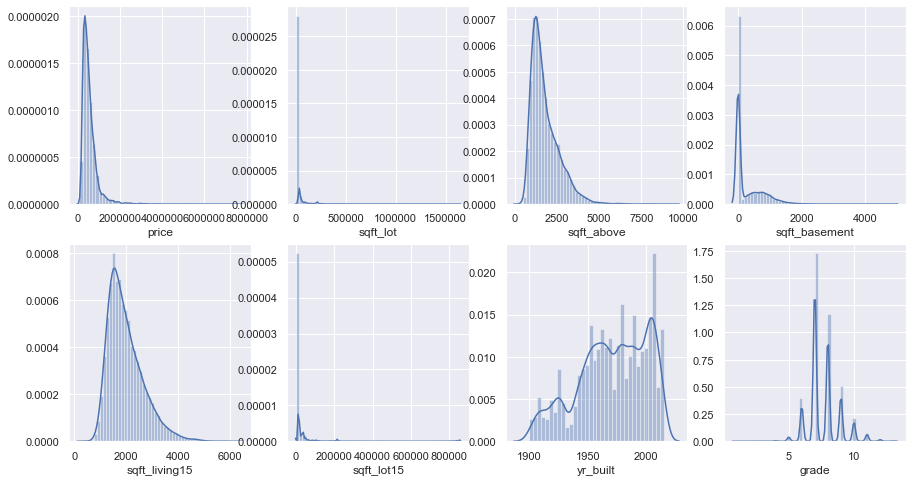

In [375]:
#seems that there are outliners right side so we need to remove the outliers
plt.figure(figsize=(15,8))
plt.subplot(241)
sns.distplot(data['price'])
plt.subplot(242)
sns.distplot(data['sqft_lot'])
plt.subplot(243)
sns.distplot(data['sqft_above'])

plt.subplot(244)
sns.distplot(data['sqft_basement'])

plt.subplot(245)
sns.distplot(data['sqft_living15'])

plt.subplot(246)
sns.distplot(data['sqft_lot15'])

plt.subplot(247)
sns.distplot(data['yr_built'])

plt.subplot(248)
sns.distplot(data['grade'])

plt.show()

## distribution for Dummy variables

'waterfront', 'view_dum','renovated_dum', 
'basement_dum', 'bedrooms', 'bathrooms',
'condition','floors', 'grade', 'city'

In [376]:
data.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'view', 'condition', 'grade', 'yr_built', 'city',
       'view_dum'],
      dtype='object')

In [377]:
# plt.figure(figsize=(12,8))
# #1=============================
# plt.subplot(221)
# plt.hist(data['waterfront'])
# plt.title('Waterfront',fontsize=12)
# # #2=============================
# plt.subplot(222)
# plt.hist(data['view'])
# plt.title('View',fontsize=12)
# #3=============================
# plt.subplot(223)
# plt.hist(data['renovated_dum'])
# plt.title('Distribution of renovated',fontsize=12)
# #4=============================
# plt.subplot(224)
# plt.hist(data['basement_dum'])
# plt.title('basement',fontsize=12)
# plt.show()


In [237]:
plt.figure(figsize=(12,12))

#5=============================
# br_dist=pd.DataFrame(data.groupby('bedrooms')['price'].mean()).reset_index()
# plt.subplot(321)
# plt.bar(br_dist['bedrooms'],br_dist['price'])
# plt.title('Bedrooms')
# #6=============================
# btr_dist=pd.DataFrame(data.groupby('bathrooms')['price'].mean()).reset_index()
# plt.subplot(322)
# plt.bar(btr_dist['bathrooms'],btr_dist['price'],width=0.25)
# plt.title('Bathroom')
#7=============================
# con_dist=pd.DataFrame(data.groupby('condition')['price'].mean()).reset_index()
# plt.subplot(323)
# plt.bar(con_dist['condition'],con_dist['price'])
# plt.title('Condition')
# #8=============================
# flr_dist=pd.DataFrame(data.groupby('floors')['price'].mean()).reset_index()
# plt.subplot(324)
# plt.bar(flr_dist['floors'],flr_dist['price'],width=0.5)
# plt.title('Floor')
# #9=============================
# gr_dist=pd.DataFrame(data.groupby('grade')['price'].mean()).reset_index()
# plt.subplot(325)
# plt.bar(gr_dist['grade'],gr_dist['price'])
# plt.title('Grade')
# plt.show()

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [238]:
#10=============================
# to get the mean for each city to and plot the distribution 
city_dist=pd.DataFrame(data.groupby('city')['price'].mean()).reset_index()
city_dist

,city,price
0,Auburn,2.939705e+05
1,Bellevue,8.910382e+05
2,Black Diamond,4.248736e+05
3,Bothell,4.906393e+05
4,Carnation,4.562057e+05
5,Duvall,4.284222e+05
6,Enumclaw,3.087681e+05
7,Fall City,5.909915e+05
8,Federal Way,2.899931e+05
9,Issaquah,6.108933e+05


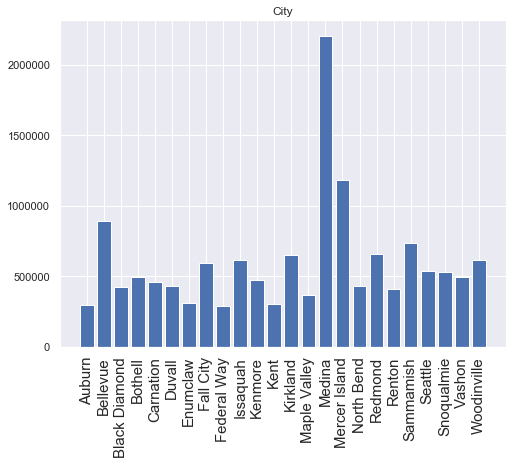

In [239]:
# plot the bar chart for mean of each city's houring price
plt.figure(figsize=(8,6))
plt.bar(city_dist['city'],city_dist['price'])
plt.title('City')
plt.xticks(rotation=90,fontsize=15)
plt.show()

# Outliers

## Remove the outliers of price

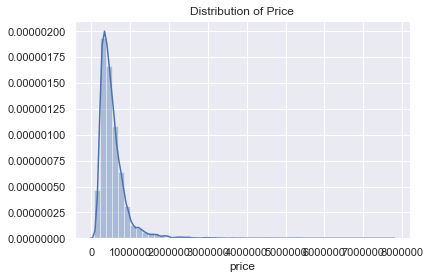

In [344]:
sns.distplot(data['price'])
plt.title('Distribution of Price')
plt.show()

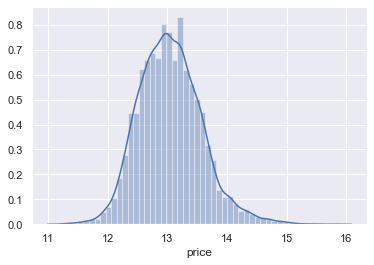

In [346]:
sns.distplot(np.log(data['price']))
data['log_price']=np.log(data['price'])

## Remove the outliers of sqrf_above

Text(0.5, 1.0, 'Distribution of Size')

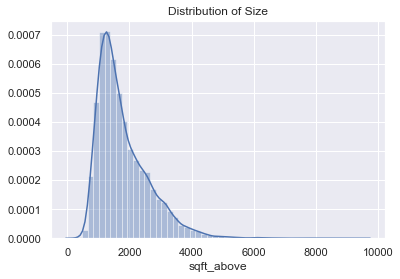

In [347]:
sns.distplot(data['sqft_above'])
plt.title('Distribution of Size')

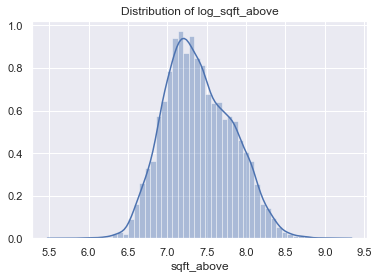

In [382]:
sns.distplot(np.log(data['sqft_above']))
plt.title('Distribution of log_sqft_above')
data['log_sqft_above']=np.log(data['sqft_above'])

## sqft_lot

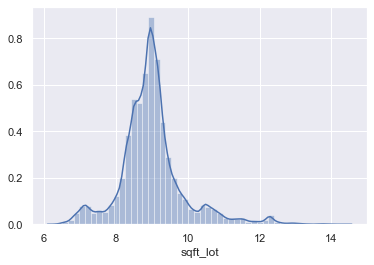

In [385]:
sns.distplot(np.log(data['sqft_lot']))
data['log_sqft_lot']=np.log(data['sqft_lot'])

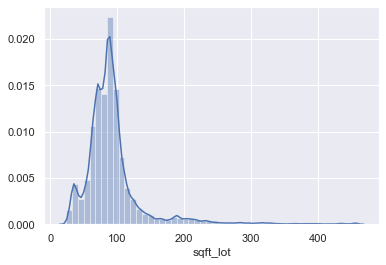

In [359]:
q3=data1['sqft_lot'].quantile(0.99)
data3=data2[data2['sqft_lot']<q3]
sns.distplot(data3['sqft_lot']**(1/2))

## Year of built

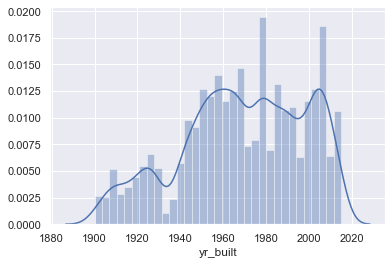

In [357]:



sns.distplot(data3['yr_built'])

## sqft_basement

In [287]:
q4=data2['sqft_basement'].quantile(0.05)

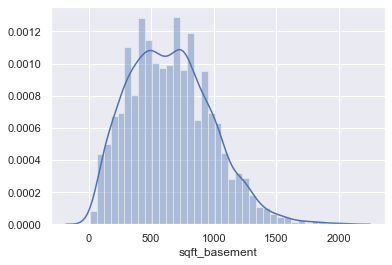

In [293]:
data41=data3[data3['sqft_basement']> q4]
sns.distplot(data41['sqft_basement'])
plt.show()

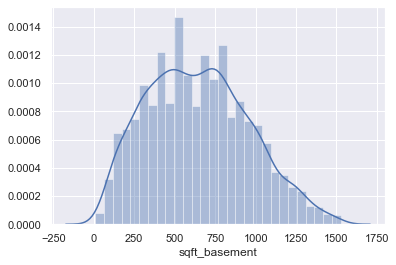

In [294]:
qq=data41['sqft_basement'].quantile(0.99)
data4=data41[data41['sqft_basement']< qq]
sns.distplot(data4['sqft_basement'])
plt.show()

## sqft_living15

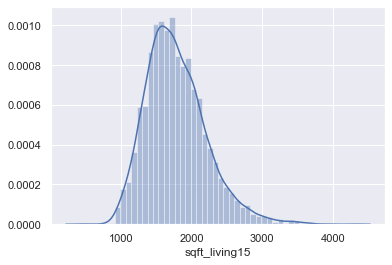

In [295]:
sns.distplot(data4['sqft_living15'])

## sqft_basement

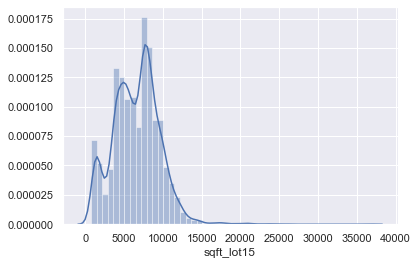

In [296]:
sns.distplot(data4['sqft_lot15'])

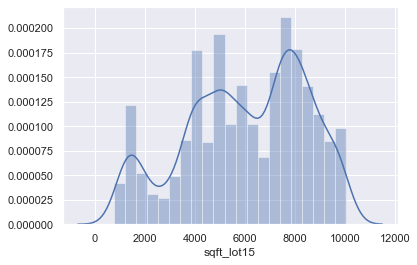

In [297]:
q5=data4['sqft_lot15'].quantile(0.9)
data5=data4[data4['sqft_lot15']<q5]
sns.distplot(data5['sqft_lot15'])

## Grade

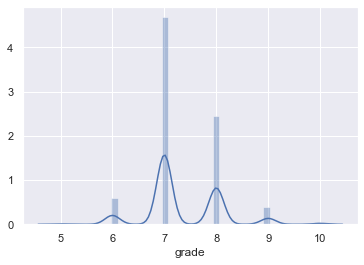

In [298]:
sns.distplot(data5['grade'])

## waterfront 

(array([3934.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         421.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

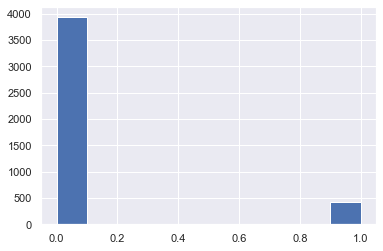

In [299]:
plt.hist(data5['view_dum'])

In [300]:
data5['condition'].min()

1

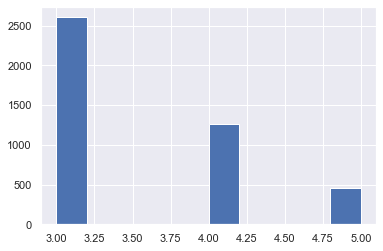

In [301]:
#q5=data5['condition'].quantile(0.01)
data6=data5[data5['condition']>2.5]
plt.hist(data6['condition'])
plt.show()

In [302]:
# plt.hist(data5['bathrooms'])    ', 'view', 'condition' city
# plt.show()
data6.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'view', 'condition', 'grade', 'yr_built', 'city',
       'view_dum'],
      dtype='object')

In [303]:
# data4=data3[data3['bathrooms']<5]
# plt.hist(data4['bathrooms'])
# plt.show()

In [304]:
data7=data6.copy()
data7.head()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,view,condition,grade,yr_built,city,view_dum
1,865000.0,6730,1830,1070,2370,6283,0,5,8,1977,Seattle,0
7,680000.0,4400,1350,450,1920,4400,0,5,7,1970,Seattle,0
10,638000.0,4400,1720,110,1650,4400,0,4,8,1930,Seattle,0
13,365000.0,1985,1750,210,1760,1985,0,3,7,2003,Seattle,0
20,485000.0,5508,1020,890,1030,7440,0,3,7,1968,Seattle,0


#  Linearty

## Before

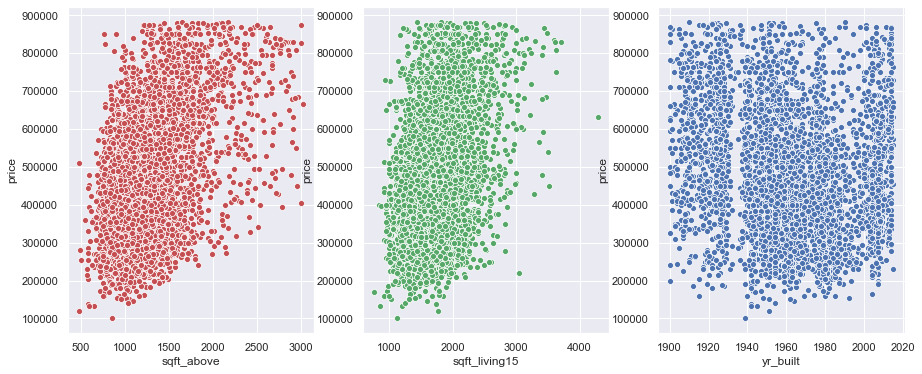

In [305]:
plt.figure(figsize=(15,6))
#============================

plt.subplot(131)
sns.scatterplot(data7['sqft_above'],data7['price'],color='r')
#============================

plt.subplot(132)
sns.scatterplot(data7['sqft_living15'],data7['price'],color='g')
#============================

plt.subplot(133)
sns.scatterplot(data7['yr_built'],data7['price'])



## After

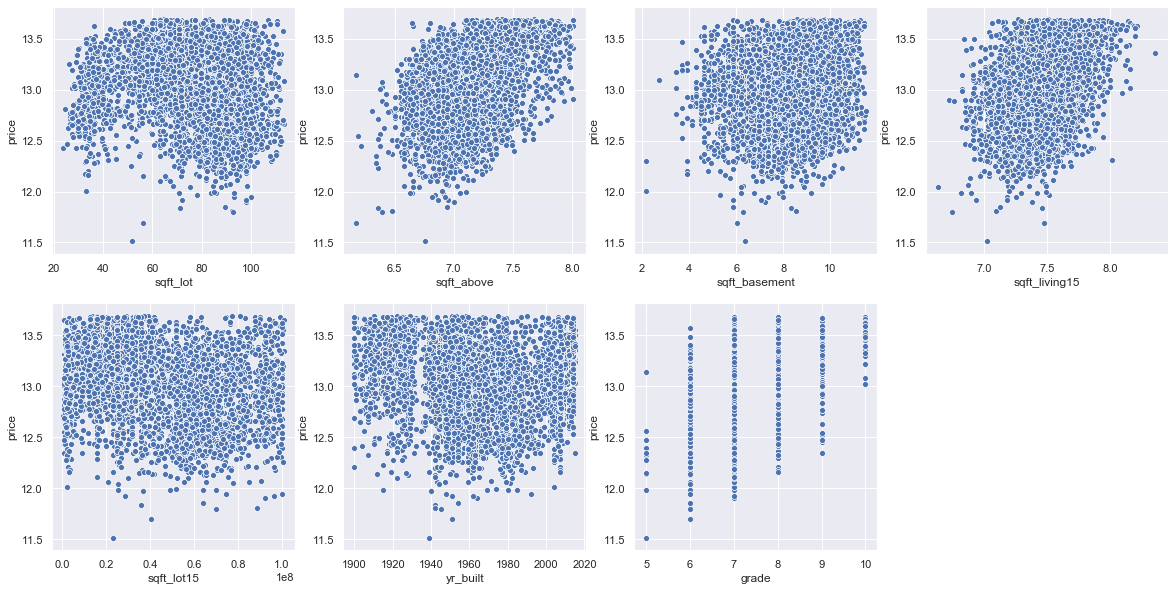

In [328]:
plt.figure(figsize=(20,10))

#============================
plt.subplot(241)
sns.scatterplot(data6['sqft_lot']**(1/2),np.log(data6['price']))
#============================
plt.subplot(242)
sns.scatterplot(np.log(data6['sqft_above']),np.log(data6['price']))
#============================
plt.subplot(243)
sns.scatterplot(data6['sqft_basement']**(1/3),np.log(data6['price']))
#============================
plt.subplot(244)
sns.scatterplot(np.log(data6['sqft_living15']),np.log(data6['price']))
#============================
plt.subplot(245)
sns.scatterplot(data6['sqft_lot15']**2,np.log(data6['price']))
#============================
plt.subplot(246)
sns.scatterplot(data6['yr_built'],np.log(data6['price']))
#============================
plt.subplot(247)
sns.scatterplot(data6['grade'],np.log(data6['price']))
plt.show()



In [307]:
#add transformed data and drop corresponding original data 

data5['log_price']=np.log(data5['price'])
data5['log_sqft_above']=np.log(data5['sqft_above'])
data5['log_sqft_above']
data5['log_sqft_above']
data5['log_sqft_above']
data5['log_sqft_above']



/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1        7.512071
7        7.207860
10       7.450080
13       7.467371
20       6.927558
           ...   
17268    7.313220
17269    7.326466
17274    7.170120
17280    7.889834
17282    7.803843
Name: log_sqft_above, Length: 4355, dtype: float64

# Multicolinearity

`When Can You Safely Ignore Multicollinearity?`

-- https://statisticalhorizons.com/multicollinearity


--When the high VIFs are caused by the inclusion of powers or products of other variables.Then we can ignore the multicolinearity

--The variables with high VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories




In [308]:
data_cleaned.columns

NameError: name 'data_cleaned' is not defined

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# but I did not put city because values in city are strings
# I don't want to use data_cleaned['sqft_above'] because I already transformed 
# so if I used log_sqft_above it may cause high VIF 

# variables = data5[['yr_built','sqft_above']]
# variables = data_cleaned[['yr_built','log_sqft_above']]
variables = data5[['waterfront', 'view_dum', 'renovated_dum', 
                  'basement_dum','sqft_above']]


# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif #  it is acceptable if it is less than 10

,VIF,Features
0,1.035072,waterfront
1,1.140726,view_dum
2,1.025390,renovated_dum
3,1.321746,basement_dum
4,1.320326,sqft_above


# Linear regression model

## Declare the inputs and the targets

In [100]:
# The target(s) (dependent variable) is 'log price'
targets = data_cleaned['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_cleaned[['waterfront', 'view_dum', 'renovated_dum', 
                  'basement_dum','log_sqft_above']]


## Scale the data

In [113]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

## Linear Regression with all variables

### obtian  coeffiticents and intercept 

In [103]:
# sklearn linear regression
reg=LinearRegression()
reg.fit(inputs_scaled,targets)
#coefficient
reg.coef_

array([0.01023887, 0.04289603, 0.01408427, 0.13519403, 0.24455724])

In [104]:
#intercept
reg.intercept_ 

12.92508212936966

### Compare our predicted data and actual data 

In [105]:
# obtian predicted data using reg.predict(all_independent_variables)
y_pre=reg.predict(inputs_scaled)


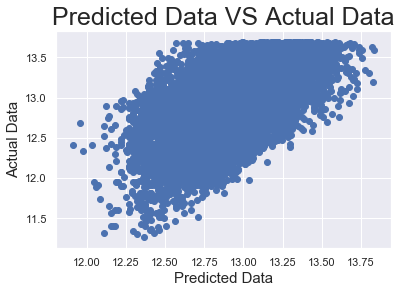

In [112]:
plt.scatter(y_pre,targets)

plt.title('Predicted Data VS Actual Data',fontsize= 25)
plt.xlabel('Predicted Data', fontsize= 15)
plt.ylabel('Actual Data', fontsize= 15)
plt.show()

### Compare R_squared and adjusted R_squared 

In [97]:
# Create a function to calculate adjusted R_square
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

#R-squared
reg.score(inputs_scaled,targets), adj_r2(inputs_scaled,targets)

(0.3683675182248209, 0.36818606677932386)

It seems the the R-squared is only slightly larger than the Adjusted R-squared, implying that we were not penalized a lot for the inclusion of 2 independent variables.

### P_values

In [ ]:
from sklearn.feature_selection import f_regression
f_regression(inputs_scaled,targets)

In [ ]:
p_values = f_regression(inputs_scaled,targets)[1]
p_values

### Summary table 

In [ ]:
# create features' table
feature=pd.DataFrame()
feature['Feature']=inputs.columns
feature['Weight']=list(reg.coef_)
feature['p_value']=p_values.round(3)
feature

In [ ]:
X=sm.add_constant(inputs_scaled)
results_ols=sm.OLS(targets,X).fit()
results_ols.summary()

# Train 

If your training accuracy is high, but your testing accuracy is low, you can’t really advertise your model as a good model. Testing data allows you to test your model on data that is independent of your training data. If your model is actually a good model (performing the correct command in this case), it should perform just as well on your training data compared to your testing data.

In [ ]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


## Create the regression

In [ ]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)
# x_train,y_train are the part of our sample 

In [ ]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat=reg.predict(x_train)


In [ ]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same

In [ ]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

## Residual is normally distributed and there is no skewness
## that mean our model is goog enoughreg.score(x_train,y_train)


In [ ]:
# Find the R-squared of the model
reg.score(x_train,y_train),adj_r2(x_train,y_train) 

In [ ]:
# Obtain the bias (intercept) of the regression
reg.intercept_

In [ ]:
# Obtain the weights (coefficients) of the regression
reg.coef_

In [ ]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

# Testing

In [ ]:
y_hat_test = reg.predict(x_test)

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.show()

In [ ]:
# we need to do np.exp(y_hat_test) for our y_hat_test because we take log for our dependent 
#variable so we need to inverse back .
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

In [ ]:
y_test=y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100).round(2)
df_pf.sort_values(by=['Difference%'])

